<a href="https://colab.research.google.com/github/hamzeh-khanpour/yy-interactions-at-the-LHeC/blob/main/Copy_of_Luminosity_Spectrum_Syy_LHeC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

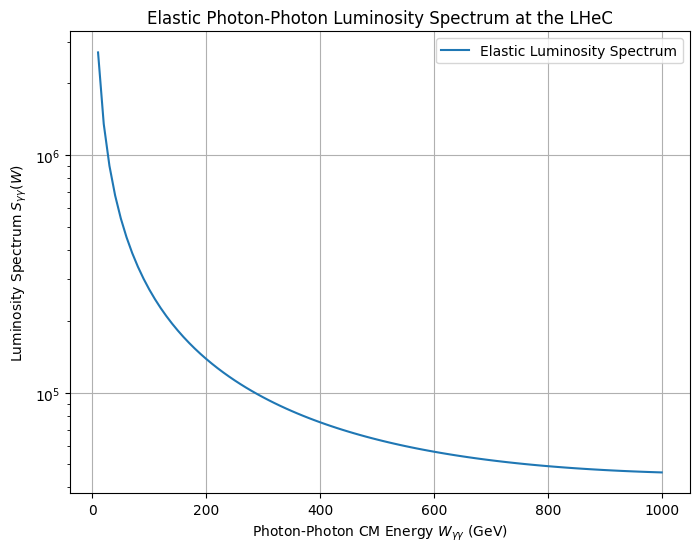

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system



# Form factors for the proton (dipole model)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)

def G_M(Q2):
    return mu_p * G_E(Q2)



# Photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    flux = 0
    Q2_values = np.linspace(Q2_min, Q2_max, 1000)
    for Q2 in Q2_values:
        flux += (G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2
    return (alpha / np.pi) * flux / y




# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    flux = 0
    Q2_values = np.linspace(Q2_min, Q2_max, 1000)
    for Q2 in Q2_values:
        flux += ((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2
    return (alpha / np.pi) * flux / y





# Luminosity spectrum calculation
def S_gamma_gamma(W, s_ep, Q2_min_e, Q2_max_e, Q2_min_p, Q2_max_p):
    luminosity = 0
    y_e_min = W**2 / s_ep
    y_e_values = np.linspace(y_e_min, 1, 1000)
    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)
        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e
    return 2 * W / s_ep * luminosity



# Parameters
Q2_min_e = 1e-5  # Minimal photon virtuality for electron (GeV^2)
Q2_max_e = 100000    # Maximal photon virtuality for electron (GeV^2)
Q2_min_p = 1e-5  # Minimal photon virtuality for proton (GeV^2)
Q2_max_p = 100000    # Maximal photon virtuality for proton (GeV^2)



# Compute and plot the luminosity spectrum
W_values = np.linspace(10, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_min_e, Q2_max_e, Q2_min_p, Q2_max_p) for W in W_values]


# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()



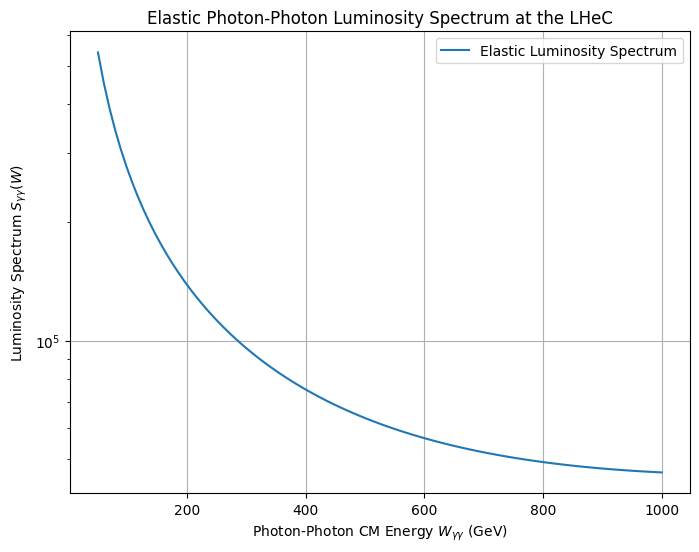

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 1 / 137  # Fine-structure constant
M_p = 0.938  # Proton mass in GeV
mu_p = 2.7927  # Proton magnetic moment
E_electron = 50  # Electron beam energy at the LHeC in GeV
E_proton = 7000  # Proton beam energy in GeV
s_ep = 4 * E_electron * E_proton  # CM energy squared of the ep system

# Form factors for the proton (dipole model)
def G_E(Q2):
    return (1 + Q2 / 0.71)**(-2)

def G_M(Q2):
    return mu_p * G_E(Q2)



# Photon flux for the proton
def phi_p(y, Q2_min, Q2_max):
    Q2_values = np.linspace(Q2_min, Q2_max, 1000)
    flux = np.sum([(G_E(Q2)**2 + (Q2 / (4 * M_p**2)) * G_M(Q2)**2) / Q2 for Q2 in Q2_values])
    return (alpha / np.pi) * flux / y



# Photon flux for the electron
def phi_e(y, Q2_min, Q2_max):
    Q2_values = np.linspace(Q2_min, Q2_max, 1000)
    flux = np.sum([((1 - y) * (1 - Q2_min / Q2) + y**2 / 2) / Q2 for Q2 in Q2_values])
    return (alpha / np.pi) * flux / y



# Luminosity spectrum calculation
def S_gamma_gamma(W, s_ep, Q2_min_e, Q2_max_e, Q2_min_p, Q2_max_p):
    luminosity = 0
    y_e_min = W**2 / s_ep
    y_e_values = np.linspace(y_e_min, 1, 1000)
    for y_e in y_e_values:
        y_p = W**2 / (y_e * s_ep)
        luminosity += phi_e(y_e, Q2_min_e, Q2_max_e) * phi_p(y_p, Q2_min_p, Q2_max_p) / y_e
    return 2 * W / s_ep * luminosity



# Parameters
Q2_min_e = 1e-5  # Minimal photon virtuality for electron (GeV^2)
Q2_max_e = 100000    # Maximal photon virtuality for electron (GeV^2)
Q2_min_p = 1e-5  # Minimal photon virtuality for proton (GeV^2)
Q2_max_p = 100000    # Maximal photon virtuality for proton (GeV^2)



# Compute and plot the luminosity spectrum
W_values = np.linspace(50, 1000, 100)  # Photon-photon CM energy in GeV
luminosity_spectrum = [S_gamma_gamma(W, s_ep, Q2_min_e, Q2_max_e, Q2_min_p, Q2_max_p) for W in W_values]



# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, luminosity_spectrum, label=r'Elastic Luminosity Spectrum')
plt.yscale('log')
plt.xlabel(r'Photon-Photon CM Energy $W_{\gamma\gamma}$ (GeV)')
plt.ylabel(r'Luminosity Spectrum $S_{\gamma\gamma}(W)$')
plt.title('Elastic Photon-Photon Luminosity Spectrum at the LHeC')
plt.grid(True)
plt.legend()
plt.show()
